In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(r"C:\Users\oper\SynologyDrive\Lab2023\KIDs\QTLab2324\IRSource\DAQ")
sys.path.append(r'C:\Users\oper\SynologyDrive\Lab2023\KIDs\QTLab2324\IRSource\API')
sys.path.append(r'C:\Users\oper\SynologyDrive\Lab2023\KIDs\QTLab2324\IRSource\API\SingleFreq')

In [2]:
from HDF5 import HDF5 as h5

In [3]:
f = 9

In [4]:
file = h5.HDF5()
filename = 'Mixer1237_'+str(f)+'GHz'
file.name = r'C:\Users\oper\SynologyDrive\Lab2023\KIDs\QTLab2324\IRSource\API\SingleFreq\files\\'+filename+'.hdf5'

In [5]:
data = file.load_hdf5()

Execution time: 0.004


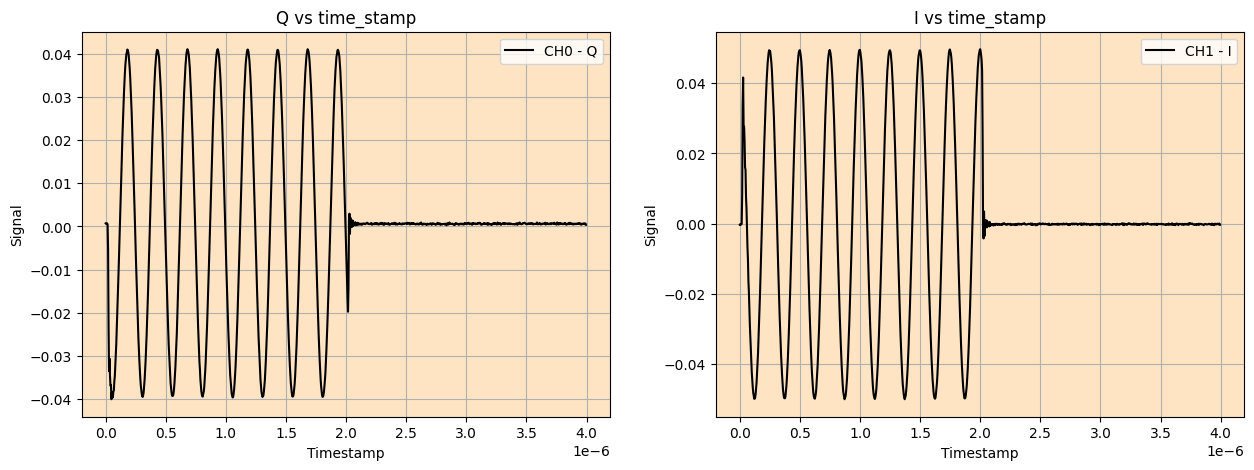

In [6]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
axs[0].plot(np.arange(len(data['CH0']))/250e6, data['CH0'], color='black', label='CH0 - Q')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Signal')
axs[0].set_title('Q vs time_stamp')
axs[0].set_facecolor('bisque')
axs[0].legend()
axs[0].grid()
axs[1].plot(np.arange(len(data['CH1']))/250e6, data['CH1'], color='black', label='CH1 - I')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Signal')
axs[1].set_title('I vs time_stamp')
axs[1].set_facecolor('bisque')
axs[1].grid()
axs[1].legend()


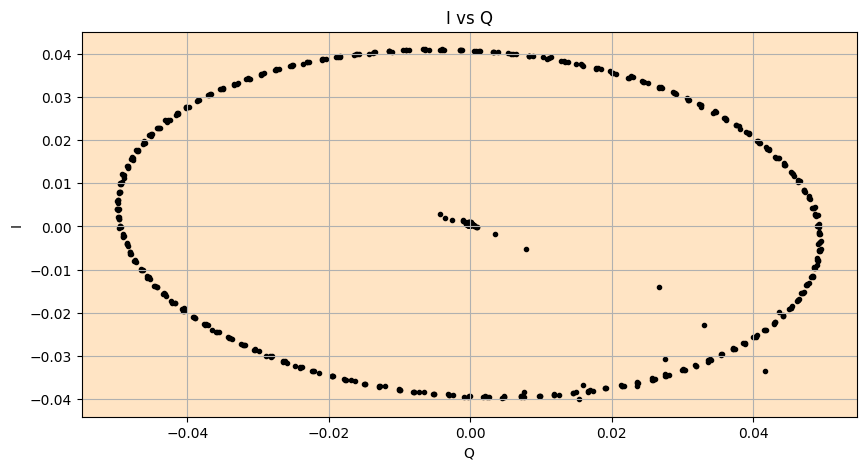

In [7]:
fig, axs = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
axs.scatter(data['CH1'], data['CH0'], marker='.', color='black', label='I vs Q')
axs.set_xlabel('Q')
axs.set_ylabel('I')
axs.set_title('I vs Q')
axs.set_facecolor('bisque')
axs.grid()

We have some data iin the inner region due to signal ringdown...we have to cut it

In [8]:
import numpy.linalg as alg

In [9]:
d = [data['CH0'], data['CH1']]

In [10]:
def distance(x,y):
    return np.sqrt(x**2 + y**2)

In [11]:
idx = []
for i,coppia in enumerate(zip(data['CH0'],data['CH1'])):
    if distance(coppia[0],coppia[1])>0.01:
        idx.append(i)

In [12]:
data['CH0'] = data['CH0'][idx]
data['CH1'] = data['CH1'][idx]

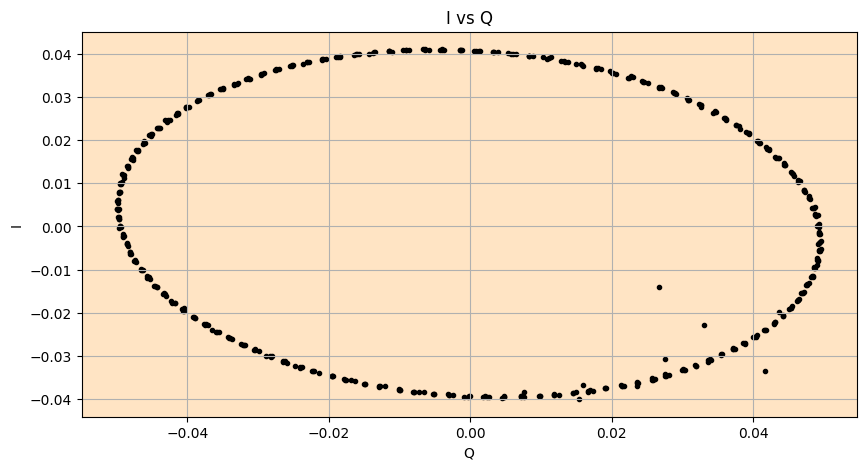

In [13]:
fig, axs = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
axs.scatter(data['CH1'], data['CH0'], marker='.', color='black', label='I vs Q')
axs.set_xlabel('Q')
axs.set_ylabel('I')
axs.set_title('I vs Q')
axs.set_facecolor('bisque')
axs.grid()

Now we can fit the ellipse

In [14]:
X = data['CH0'].reshape(len(data['CH0']),1)
Y = data['CH1'].reshape(len(data['CH1']),1)

In [15]:
A = np.hstack([X**2, X * Y, Y**2, X, Y])
b = np.ones_like(X)
x = np.linalg.lstsq(A, b)[0].squeeze()
results = {
    'x^2': x[0],
    'xy' : x[1],
    'y^2': x[2],
    'x'  : x[3],
    'y'  : x[4]
}

C:\Users\oper\AppData\Local\Temp\ipykernel_7296\1908620451.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0].squeeze()


In [16]:
with open ('files\\'+filename+'.txt', 'w') as file:
    file.write(str(results))

In [17]:
print('The ellipse is given by {0:.3}x^2 + {1:.3}xy + {2:.3}y^2 + {3:.3}x + {4:.3}y = 1'.format(x[0], x[1],x[2],x[3],x[4]))

x_coord = np.linspace(min(data['CH0'])*1.1,max(data['CH0'])*1.1,len(data['CH0']))
y_coord = np.linspace(min(data['CH1'])*1.1,max(data['CH1'])*1.1,len(data['CH1']))
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord

The ellipse is given by 6.23e+02x^2 + 97.4xy + 4.11e+02y^2 + -0.912x + 0.135y = 1


Let's plot results!

C:\Users\oper\AppData\Local\Temp\ipykernel_7296\3465771074.py:4: UserWarning: The following kwargs were not used by contour: 'label'
  axs.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=1, label='Fit')


Text(0, 0.5, 'I')

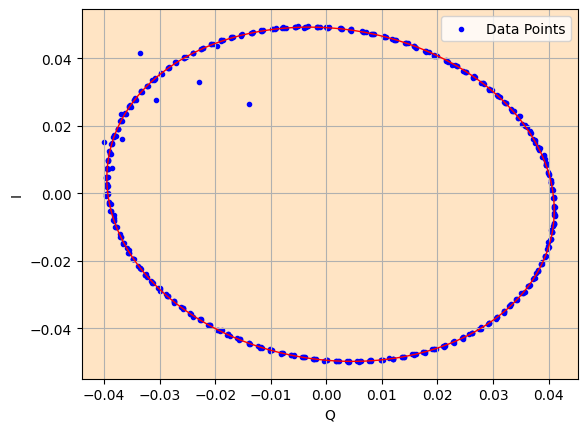

In [18]:
fig, axs = plt.subplots(1,1)
axs.set_facecolor('bisque')
axs.scatter(X, Y, label='Data Points', marker='.', color='blue')
axs.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=1, label='Fit')
axs.grid()
axs.legend()
axs.set_xlabel('Q')
axs.set_ylabel('I')